In [4]:
from typing import List
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs: List[torch.Tensor]):
    """
    tensor list를 plt으로 한row로 그린다.    
    """
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

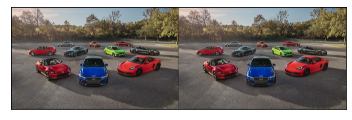

In [5]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

car = read_image('car.jpg')

grid = make_grid([car, car])
show(grid)

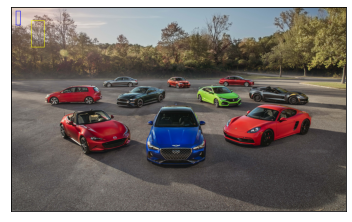

In [7]:
from torchvision.utils import draw_bounding_boxes


boxes = torch.tensor([
    [50, 50, 100, 200], 
    [210, 150, 350, 430]
], dtype=torch.float)
colors = ["blue", "yellow"]
result = draw_bounding_boxes(car, boxes, colors=colors, width=5)
show(result)

In [18]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms.functional import convert_image_dtype


batch_int = torch.stack([car])
batch = convert_image_dtype(batch_int, dtype=torch.float)

model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

outputs = model(batch)
print(outputs)

[{'boxes': tensor([[1635.5510,  733.9691, 1883.2721,  858.3848],
        [1090.2979,  831.0725, 1616.1503, 1057.9868],
        [2211.0547, 1023.2090, 3133.7617, 1477.3441],
        [1940.4222,  822.9277, 2421.6846, 1055.2271],
        [ 491.8738, 1081.4347, 1260.4280, 1533.7958],
        [ 356.6774,  822.3189,  954.5173, 1028.1844],
        [ 960.4736,  736.0134, 1322.7144,  849.2552],
        [1407.6622, 1034.3492, 2049.5898, 1686.9824],
        [2477.7917,  831.5595, 3110.5356, 1031.2653],
        [2167.1729,  726.0698, 2545.2468,  844.5479],
        [ 665.3751,  849.2485,  718.1766,  898.4152],
        [ 718.5601,  853.1947,  750.3588,  893.4512],
        [ 507.2654,  451.8458,  587.9620,  524.4924],
        [ 618.6317,  858.9545,  667.8679,  903.8608],
        [ 703.1926,  855.1423,  736.8699,  895.8842],
        [2623.8301, 1075.7135, 2752.5459, 1179.2072]], grad_fn=<StackBackward>), 'labels': tensor([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1, 37,  1,  1,  1]), 'scores': tens

In [20]:
score_threshold = .8
dogs_with_boxes = [
    draw_bounding_boxes(dog_int, boxes=output['boxes'][output['scores'] > score_threshold], width=4) for dog_int, output in zip(batch_int, outputs)
]

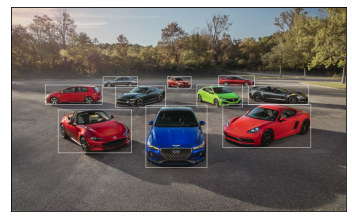

In [21]:
show(dogs_with_boxes)